In [65]:
%matplotlib inline
import numpy as np
import os.path
from datetime import date, timedelta
import json
import pandas as pd
from bokeh.layouts import gridplot
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook
import matplotlib
from ggplot import *

In [42]:
df = pd.read_csv("./data/test_data/prelim_data.csv",index_col=0)
df = df.astype(float)
df.reset_index(inplace=True,drop=True)
victory = df.iloc[::2]
defeat = df.iloc[1::2]
df.head()

,baronKills,dominionVictoryScore,dragonKills,firstBaron,firstBlood,firstDragon,firstInhibitor,firstRiftHerald,firstTower,inhibitorKills,...,winner,gameLength,goldTotal,goldDiff,killTotal,killDiff,towerDiff,inhibitorDiff,baronDiff,dragonDiff
0,1.0,0.0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,22.383333,44281.0,8632.0,32.0,15.0,4.0,0.0,1.0,2.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,22.383333,35649.0,-8632.0,17.0,-15.0,-4.0,0.0,-1.0,-2.0
2,2.0,0.0,2.0,1.0,1.0,1.0,1.0,0.0,1.0,2.0,...,1.0,38.383333,73660.0,17443.0,34.0,18.0,8.0,2.0,2.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,38.383333,56217.0,-17443.0,16.0,-18.0,-8.0,-2.0,-2.0,-1.0
4,0.0,0.0,4.0,0.0,0.0,1.0,1.0,0.0,0.0,4.0,...,1.0,42.483333,81714.0,5439.0,46.0,13.0,7.0,4.0,-1.0,4.0


In [10]:
output_notebook()

Loading BokehJS ...

In [19]:
game_duration = victory[['gameLength']]
game_duration.describe()

,gameLength
count,15121.000000
mean,33.615027
std,7.687349
min,9.716667
25%,28.383333
50%,33.100000
75%,38.316667
max,75.650000


In [30]:
game_duration.mean()

gameLength    33.615027
dtype: float64

In [66]:
binwidth = 50
p = figure(title="Game Duration Distribution(μ=33.6, σ=7.7)",plot_width=800, plot_height=300)
hist,edges = np.histogram(game_duration,bins=binwidth,density=True)
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
        fill_color="dodgerblue", line_color="black")
p.xaxis.axis_label = 'Game Duration (minutes)'
p.yaxis.axis_label = 'N Games'
show(p)
#output_file('gameDuration_hist.png')

In [43]:
gold_diff = victory[['goldDiff']]
gold_diff.describe()


,goldDiff
count,15121.000000
mean,11089.739303
std,5204.529287
min,-17478.000000
25%,7810.000000
50%,11541.000000
75%,14814.000000
max,26012.000000


In [67]:
binwidth = 50
p = figure(title="Gold Difference Distribution(μ=11089.7, σ=5204.5)",plot_width=800, plot_height=300)
hist,edges = np.histogram(gold_diff,bins=binwidth,density=True)
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
        fill_color="dodgerblue", line_color="black")
p.xaxis.axis_label = 'Gold Difference'
p.yaxis.axis_label = 'N'
show(p)
#output_file('histogram_gametime.html')

In [69]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn import cross_validation


In [219]:
#features to look at 
features = np.array(['gameLength',
             'baronKills',
             'dragonKills',
             'firstBaron',
             'firstBlood',
             'firstDragon',
             'firstInhibitor',
             'firstRiftHerald',
             'firstTower',
             'inhibitorKills',
             'riftHeraldKills',
             'towerKills',
             'goldTotal',
             'goldDiff',
             'killTotal',
             'killDiff',
             'towerDiff',
             'inhibitorDiff',
             'baronDiff',
             'dragonDiff'])

N_features = np.size(features)


In [220]:
gnb = GaussianNB()
def quick_score(games_df,col):
    X = games_df[[col]]
    y = games_df['winner'].ravel()
    gnb.fit(X,y)
    return gnb.score(X,y)
scores = [(x,quick_score(df,x)) for x in features]
sorted(scores, key=lambda x: x[1], reverse=True)

[('goldDiff', 0.97447258779181267),
 ('towerDiff', 0.97252165862046158),
 ('killDiff', 0.92064016930097214),
 ('inhibitorDiff', 0.91908603928311616),
 ('towerKills', 0.90946365981085908),
 ('firstInhibitor', 0.88066265458633686),
 ('inhibitorKills', 0.79101911249255996),
 ('dragonDiff', 0.7774948746776007),
 ('dragonKills', 0.75332319291052174),
 ('killTotal', 0.73473976588849943),
 ('baronDiff', 0.71380861054163081),
 ('baronKills', 0.71172541498578135),
 ('firstTower', 0.70054890549566828),
 ('firstBaron', 0.69922624165068448),
 ('firstDragon', 0.67002843727266714),
 ('goldTotal', 0.66199325441439061),
 ('firstBlood', 0.58951127570927853),
 ('firstRiftHerald', 0.54807883076516106),
 ('riftHeraldKills', 0.54807883076516106),
 ('gameLength', 0.5)]

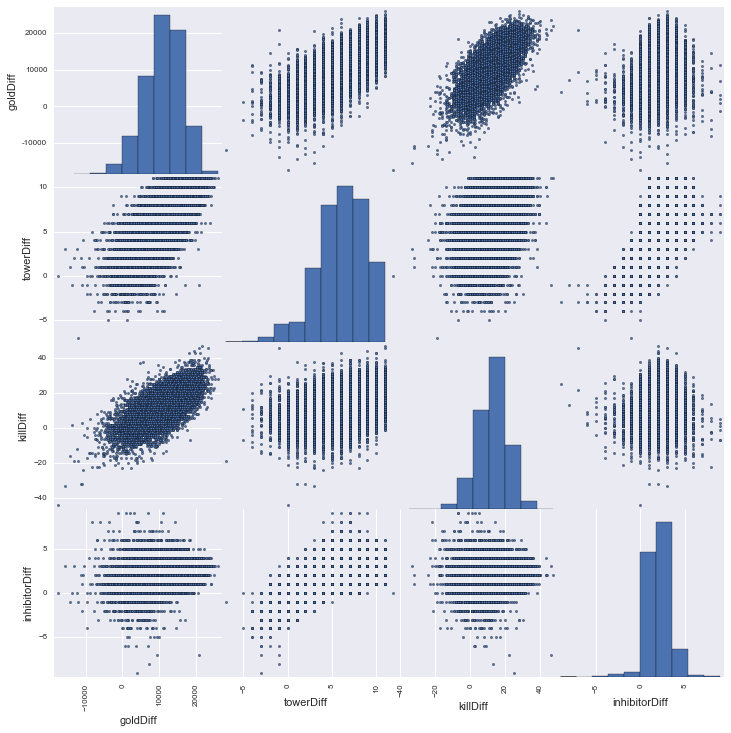

In [56]:
plot = pd.scatter_matrix(victory[['goldDiff','towerDiff','killDiff','inhibitorDiff']], alpha=1.0,figsize=(12,12),diagonal='hist');

In [82]:
killsum = df['towerKills'].sum()
vsum = victory['towerKills'].sum()
vsum/killsum


0.7579424437945123